In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* [Исследование взаимосвязей](#first-bullet)
* [COVID-19](#second-bullet)
* [Рейтинг губернаторов](#third-bullet)

**Задачи, которые следует выполнить в ходе исследования:**

1. Выявить корреляции между статистическими показателями
2. Проверить предположение, что смертность выше в регионах с меньшим количеством коек и медицинского персонала
3. Проверить предположение, что смертность от COVID - 19 выше в регионах с более высокой смертностью от других причин
4. Проверить предположение, что рейтинг губернаторов коррелирует с показателями смертности и медицинского обеспечения в регионах

Выгружаем данные из собранного датасета со статистическими данными по медицине.
Источники: Росстат, Yandex.DataLens

# Описание показателей: 
**region** - Регион; 

**popul** - Численность населения; 

**exp** - Ожидаемая продолжительность жизни при рождении, лет;

**avg** - Средний возраст;

**deaths_work** - Смертность населения трудоспособного возраста на 100 тыс. населения, чел;

**deaths_blood** - Смертность от болезней системы кровообращения на 100 тыс. населения, чел;

**deaths_resp** - Смертность от болезней органов дыхания на 100 тыс.;

**deaths_inf** - Смертность от инфекционных заболеваний на 100 тыс.;

**bed** - Количество больничных коек на 10 тыс. населения, шт;

**capacity** - Мощность амбулаторных поликлинических организаций на 10 тыс. населения, визитов в смену;

**doc** - Кол-во врачей на 10 тыс. населения, чел;

**nurse** - Кол-во среднего медперсонала на 10 тыс. населения, чел;

**cases_cov** - Заболевших COVID-19, на 100 тыс;

**deaths_cov** - Умерших от COVID-19, на 100 тыс;

**rate_gov** - Рейтинг губернаторов

In [71]:
med = pd.read_csv('Medic.csv', ';')
med

,Reg,popul,exp,avg,deaths_work,deaths_blood,deaths_resp,deaths_inf,bed,capacity,doc,nurse,cases_cov,deaths_cov,rate_gov
0,Belgorod,1 547 418,"74,20","41,10",399,721,56,5,"70,60","263,20","40,70","105,90","4276,40","87,90","3,40"
1,Bryansk,1 200 187,"72,00","41,30",540,729,66,8,"71,10","293,90","41,80","113,50","6765,00","166,10","4,40"
2,Vladimir,1 365 805,"71,90","41,90",562,824,45,10,"83,00","361,70","35,10","95,80","4815,10","167,80","2,90"
3,Voronezh,2 327 821,"73,70","41,90",435,563,32,6,"80,00","262,80","51,50","108,80","6983,60","223,30","5,00"
4,Ivanovo,1 004 180,"72,30","41,80",560,581,50,14,"77,80","255,50","42,90","100,70","5699,80","191,40","5,20"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Amur,793 194,"69,50","37,90",599,399,48,22,"88,00","283,20","54,10","109,70","5251,10","62,20","3,00"
80,Magadan,141 234,"69,30","38,30",627,479,87,7,"106,50","436,60","64,20","163,50","8396,80","202,00","4,60"
81,Sakhalin,489 638,"70,30","38,60",568,232,49,18,"111,20","257,20","61,20","132,20","7336,10","80,00","5,60"
82,Evrey,159 913,"69,50","37,60",557,761,74,25,"118,70","289,30","35,70","118,10","6019,90","192,00","4,20"


**Запрашиваем характеристики датасета**

In [72]:
med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Reg           84 non-null     object
 1   popul         84 non-null     object
 2   exp           84 non-null     object
 3   avg           84 non-null     object
 4   deaths_work   84 non-null     int64 
 5   deaths_blood  84 non-null     int64 
 6   deaths_resp   84 non-null     int64 
 7   deaths_inf    84 non-null     int64 
 8   bed           84 non-null     object
 9   capacity      84 non-null     object
 10  doc           84 non-null     object
 11  nurse         84 non-null     object
 12  cases_cov     84 non-null     object
 13  deaths_cov    84 non-null     object
 14  rate_gov      84 non-null     object
dtypes: int64(4), object(11)
memory usage: 10.0+ KB


**Необходимо изменить тип данных object на float64 и int64**

In [73]:
def convert_currency(val):
    """
    Преобразует числовое значение строки в число с плавающей точкой:
    
    """
    new_val = val.replace(',', '.')
    return float(new_val)
def convert_cur(val):
    """
    Преобразует числовое значение строки в число с плавающей точкой:
     
    """
    new_val = val.replace(' ', '')
    return int(new_val)

In [74]:
med = pd.read_csv('Medic.csv', ';',
                 converters = {'popul' : convert_cur,
                               'exp': convert_currency,
                               'avg': convert_currency,
                               'bed': convert_currency,
                               'capacity': convert_currency,
                               'doc': convert_currency,
                               'nurse': convert_currency,
                               'cases_cov': convert_currency,
                               'deaths_cov': convert_currency,
                               'rate_gov': convert_currency,})
med
med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Reg           84 non-null     object 
 1   popul         84 non-null     int64  
 2   exp           84 non-null     float64
 3   avg           84 non-null     float64
 4   deaths_work   84 non-null     int64  
 5   deaths_blood  84 non-null     int64  
 6   deaths_resp   84 non-null     int64  
 7   deaths_inf    84 non-null     int64  
 8   bed           84 non-null     float64
 9   capacity      84 non-null     float64
 10  doc           84 non-null     float64
 11  nurse         84 non-null     float64
 12  cases_cov     84 non-null     float64
 13  deaths_cov    84 non-null     float64
 14  rate_gov      84 non-null     float64
dtypes: float64(9), int64(5), object(1)
memory usage: 10.0+ KB


## Исследование взаимосвязей <a class="anchor" id="first-bullet"></a>
**Теперь мы готовы к исследованию взаимосвязей. Выбираем интересующие столбцы**

In [75]:
search = ['exp', 'avg', 'capacity', 'doc', 'deaths_cov', 'rate_gov', 'deaths_work', 'deaths_blood', 'deaths_resp', 'deaths_inf', 'bed', 'nurse', 'cases_cov']
med[search].head()

,exp,avg,capacity,doc,deaths_cov,rate_gov,deaths_work,deaths_blood,deaths_resp,deaths_inf,bed,nurse,cases_cov
0,74.2,41.1,263.2,40.7,87.9,3.4,399,721,56,5,70.6,105.9,4276.4
1,72.0,41.3,293.9,41.8,166.1,4.4,540,729,66,8,71.1,113.5,6765.0
2,71.9,41.9,361.7,35.1,167.8,2.9,562,824,45,10,83.0,95.8,4815.1
3,73.7,41.9,262.8,51.5,223.3,5.0,435,563,32,6,80.0,108.8,6983.6
4,72.3,41.8,255.5,42.9,191.4,5.2,560,581,50,14,77.8,100.7,5699.8


In [76]:
corr_m = med[search].corr()

In [77]:
corr_m

,exp,avg,capacity,doc,deaths_cov,rate_gov,deaths_work,deaths_blood,deaths_resp,deaths_inf,bed,nurse,cases_cov
exp,1.000000,0.052597,-0.607732,-0.211491,0.122972,0.280718,-0.887663,-0.151264,-0.380745,-0.469761,-0.597153,-0.513922,-0.081341
avg,0.052597,1.000000,0.193090,-0.191580,0.251468,0.139057,0.314677,0.696554,0.215159,-0.130207,-0.015706,-0.277021,0.041819
capacity,-0.607732,0.193090,1.000000,0.368972,0.175164,-0.195359,0.654938,0.215415,0.313040,0.102860,0.349050,0.498974,0.329067
doc,-0.211491,-0.191580,0.368972,1.000000,0.147348,0.055373,0.121884,-0.263762,-0.175218,0.111563,0.358099,0.494537,0.361127
deaths_cov,0.122972,0.251468,0.175164,0.147348,1.000000,0.093425,-0.020250,0.272082,-0.158096,-0.039274,0.027884,0.047469,0.516650
rate_gov,0.280718,0.139057,-0.195359,0.055373,0.093425,1.000000,-0.233818,-0.047865,-0.240587,0.013100,-0.238871,-0.269242,-0.006099
deaths_work,-0.887663,0.314677,0.654938,0.121884,-0.020250,-0.233818,1.000000,0.424340,0.502604,0.447072,0.525479,0.361207,0.107575
deaths_blood,-0.151264,0.696554,0.215415,-0.263762,0.272082,-0.047865,0.424340,1.000000,0.331084,0.016512,0.142106,-0.167890,0.131101
deaths_resp,-0.380745,0.215159,0.313040,-0.175218,-0.158096,-0.240587,0.502604,0.331084,1.000000,0.003672,0.266967,0.109706,-0.074069
deaths_inf,-0.469761,-0.130207,0.102860,0.111563,-0.039274,0.013100,0.447072,0.016512,0.003672,1.000000,0.328097,0.087530,-0.204136


**Визуализируем полученную матрицу**

<AxesSubplot:>

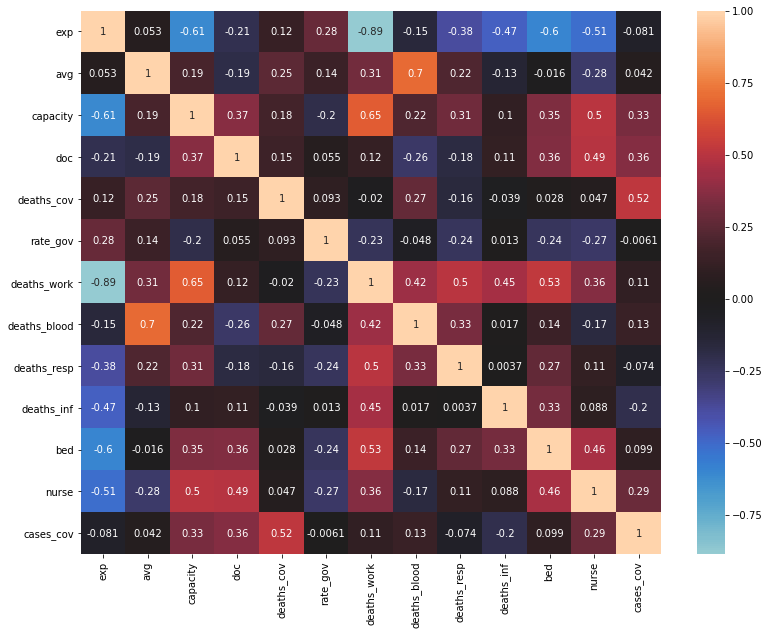

In [78]:
plt.figure(figsize=(13,10))
sns.heatmap(corr_m, center=0, annot=True)

**Видно, что есть сильные обратные и прямые связи. Теперь построим диаграмму рассеяния для каждой пары признаков со связями умеренной значимости c показателем deaths_work. Умеренная значимость по шкале Чеддока - при коэффициенте корреляции от 0.3 по модулю и выше**

Коэффициент корреляции -0.8876628932794225


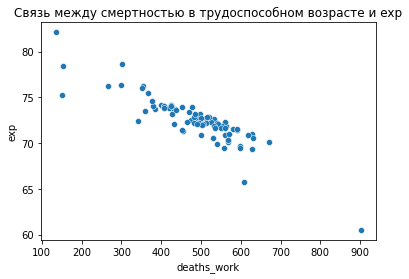

Коэффициент корреляции 0.31467727558847913


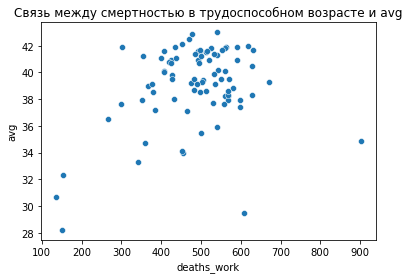

Коэффициент корреляции 0.654938459560477


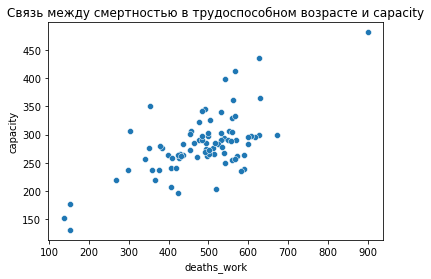

Коэффициент корреляции 0.9999999999999999


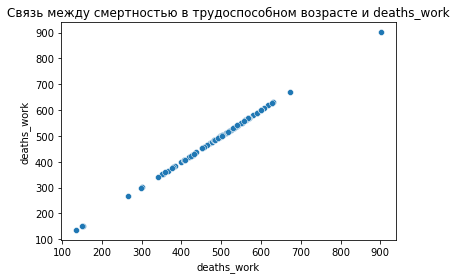

Коэффициент корреляции 0.42433964682101233


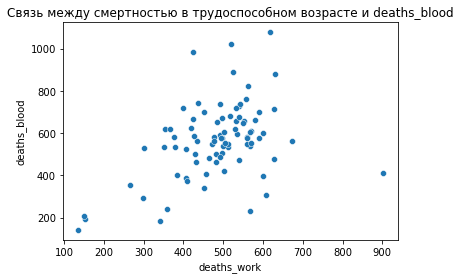

Коэффициент корреляции 0.5026037033715903


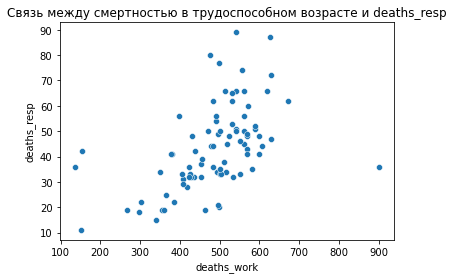

Коэффициент корреляции 0.44707229058779036


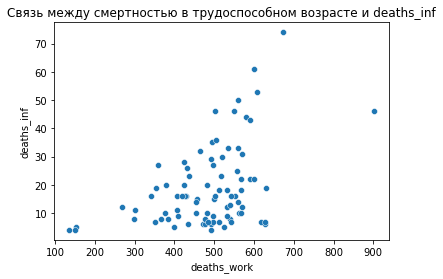

Коэффициент корреляции 0.525479209016793


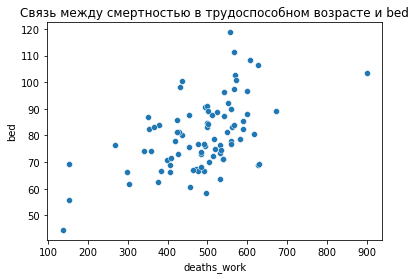

Коэффициент корреляции 0.3612071458080848


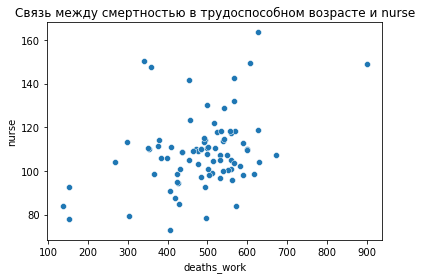

In [86]:
level = 0.3
for i in search[:-1]:
    curr_corr = med[i].corr(med.deaths_work)
    if abs(curr_corr) >= level:
        sns.scatterplot(x="deaths_work", y=i, data=med)
        print("Коэффициент корреляции " + str(curr_corr))
        plt.title("Связь между смертностью в трудоспособном возрасте и "+str(i))
        plt.show()

Вполне предсказуемо мы наблюдаем высокую силу связи между смертностью в трудоспособном возрасте и ожидаемой продолжительностью жизни **(-0,89)**. Чем выше смертность в трудоспособном возрасте - тем ниже значение ожидаемой продолжительности жизни.

Намного более удивительным является наблюдение другого характера. Перед началом исследования, было предположение, что одними из факторов смертности в целом, и в трудоспособном возрасте в частности, будут нехватка коечного фонда, более низкое количество медицинского персонала в регионах с повышенными показателями смертности, меньшая мощность амбулаторных поликлинических организаций и следовательно сложность в получении медицинской помощи.

Однако, как показывают результаты исследования, отношение смертности в трудоспособном возрасте и мощности амбулаторных поликлинических организаций на 10 тыс. человек характеризуется заметным уровнем связи по шкале Чеддока **(0,65)**, отношение смертности в трудоспособном возрасте и количества больничных коек на 10 тыс. человек также характеризуется заметным уровнем связи по шкале Чеддока **(0,52)**. Кроме того, умеренной связью характеризуется отношение смертности в трудоспособном возрасте и количество среднего медицинского персонала **(0,36)**.

Можно предположить, что недостаточная работа в сфере предупреждения болезней, а также социально - экономические, экологические, природные и другие факторы, влияющие на развитие заболеваний, компенсируются органами власти регионов, путем предоставления широкой базы амбулаторий и стационаров. Заметный уровень связи наблюдаем между смертностью в трудоспособном возрасте и смертностью, связанной с болезнями органов дыхания **(0,5)**, которые как правило вызваны экологическими и климатическими особенностями региона, а также вредными привычками - в частности курением. 

Коэффициент корреляции -0.6077315824948891


<AxesSubplot:xlabel='capacity', ylabel='exp'>

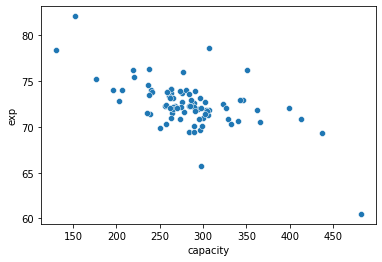

In [80]:
curr_co = med['capacity'].corr(med.exp)
curr_co
print("Коэффициент корреляции " + str(curr_co))
sns.scatterplot(x="capacity", y='exp', data=med)

Данный график отражает заметную связь между ожидаемой продолжительностью жизни и мощностью амбулаторных поликлинических организаций **(-0,61)**. Чем выше продолжительность жизни - тем меньше мощность амбулаторий в регионе.

На основании вышеописанных графиков, можно предположить, что количество медицинского персонала, наличие больших объемов коечного фонда, возможность приема большого количества пациентов, не являются определяющими факторами в вопросе увеличения продолжительности жизни или снижения смертности. Скорее всего, их можно рассматривать как часть системы предупреждения и лечения заболеваний, а не как основу. 

## COVID-19 <a class="anchor" id="second-bullet"></a>

Text(0.5, 1.0, '3 sigma и 95 квантиль для распределения')

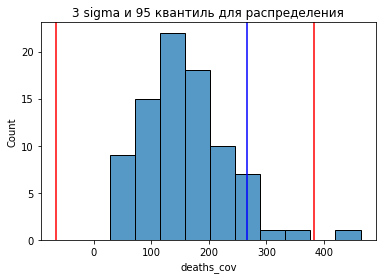

In [54]:
upper_level = med['deaths_cov'].mean() + 3*med['deaths_cov'].std()
lower_level = med['deaths_cov'].mean() - 3*med['deaths_cov'].std()
level_95 = np.percentile(med['deaths_cov'], 95)

sns.histplot(med['deaths_cov'])
plt.axvline(x=lower_level, color="r", linestyle="-")
plt.axvline(x=upper_level, color="r", linestyle="-")
plt.axvline(x=level_95, color="b", linestyle="-")
plt.title("3 sigma и 95 квантиль для распределения")

**Построили график распределения смертности от Ковид - 19. Кроме того, воспользовались правилом трех сигм и выделили 95% квантиль.**

**Отфильтруем данные свыше 95% квантиля.**

In [81]:
kvant = med[med['deaths_cov'] >= level_95]
kvant

,Reg,popul,exp,avg,deaths_work,deaths_blood,deaths_resp,deaths_inf,bed,capacity,doc,nurse,cases_cov,deaths_cov,rate_gov
24,Murmansk,748056,72.1,38.5,498,575,20,9,91.1,297.3,51.8,130.4,10863.5,320.3,4.4
27,Spb,5383890,76.2,41.2,354,621,19,19,82.4,350.3,82.1,110.2,13862.5,463.5,6.5
35,Sevastopol,443212,74.0,40.7,424,983,32,28,85.7,196.0,49.4,94.9,9826.0,342.4,5.1
53,Penza,1318103,73.9,42.1,453,700,37,10,75.8,273.3,43.0,105.2,6339.9,285.2,4.3
65,Hakasiya,536167,70.6,37.7,531,618,62,18,63.6,340.2,43.8,104.8,8605.2,266.8,2.9


**По количеству умерших от COVID-19 на 100 тысяч человек, за пределы 95% доверительного интервала выходят 5 регионов. Проанализируем данную выборку и сравним ее со значениями общей выборки.**

In [60]:
kvant.describe()

,popul,exp,avg,deaths_work,deaths_blood,deaths_resp,deaths_inf,bed,capacity,doc,nurse,cases_cov,deaths_cov,rate_gov
count,5.000000e+00,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,1.685886e+06,73.36000,40.040000,452.000000,699.400000,34.000000,16.800000,79.720000,291.420000,54.020000,109.100000,9899.420000,335.640000,4.640000
std,2.095001e+06,2.11967,1.862257,68.458016,164.831126,17.449928,7.726578,10.579083,61.875334,16.129538,13.136209,2783.254923,77.318064,1.310725
min,4.432120e+05,70.60000,37.700000,354.000000,575.000000,19.000000,9.000000,63.600000,196.000000,43.000000,94.900000,6339.900000,266.800000,2.900000
25%,5.361670e+05,72.10000,38.500000,424.000000,618.000000,20.000000,10.000000,75.800000,273.300000,43.800000,104.800000,8605.200000,285.200000,4.300000
50%,7.480560e+05,73.90000,40.700000,453.000000,621.000000,32.000000,18.000000,82.400000,297.300000,49.400000,105.200000,9826.000000,320.300000,4.400000
75%,1.318103e+06,74.00000,41.200000,498.000000,700.000000,37.000000,19.000000,85.700000,340.200000,51.800000,110.200000,10863.500000,342.400000,5.100000
max,5.383890e+06,76.20000,42.100000,531.000000,983.000000,62.000000,28.000000,91.100000,350.300000,82.100000,130.400000,13862.500000,463.500000,6.500000


In [59]:
med.describe()

,popul,exp,avg,deaths_work,deaths_blood,deaths_resp,deaths_inf,bed,capacity,doc,nurse,cases_cov,deaths_cov,rate_gov
count,8.400000e+01,84.000000,84.000000,84.00000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,1.747390e+06,72.488095,39.094048,484.47619,564.535714,43.476190,19.035714,80.004762,282.278571,47.860714,108.772619,6061.432143,158.870238,4.598810
std,1.805855e+06,2.593384,2.951387,114.79720,176.855768,16.632438,14.317776,13.254832,53.586937,9.106452,16.814239,2696.012560,74.623981,1.015126
min,4.966300e+04,60.500000,28.200000,136.00000,141.000000,11.000000,4.000000,44.500000,130.400000,29.800000,72.900000,851.200000,28.000000,2.900000
25%,7.459088e+05,71.400000,37.975000,425.50000,481.250000,33.000000,8.000000,70.975000,260.300000,42.400000,98.950000,4380.800000,100.975000,3.875000
50%,1.183950e+06,72.300000,39.500000,498.00000,575.000000,42.000000,16.000000,78.250000,278.950000,46.650000,108.150000,5376.400000,151.050000,4.600000
75%,2.329069e+06,73.725000,41.325000,557.75000,659.250000,51.250000,25.250000,87.500000,300.350000,52.125000,114.125000,7228.700000,197.350000,5.200000
max,1.261528e+07,82.100000,43.000000,901.00000,1077.000000,89.000000,74.000000,118.700000,481.600000,82.100000,163.500000,15048.700000,463.500000,8.000000


In [61]:
kvant.describe() - med.describe()

,popul,exp,avg,deaths_work,deaths_blood,deaths_resp,deaths_inf,bed,capacity,doc,nurse,cases_cov,deaths_cov,rate_gov
count,-7.900000e+01,-79.000000,-79.000000,-79.000000,-79.000000,-79.000000,-79.000000,-79.000000,-79.000000,-79.000000,-79.000000,-79.000000,-79.000000,-79.000000
mean,-6.150392e+04,0.871905,0.945952,-32.476190,134.864286,-9.476190,-2.235714,-0.284762,9.141429,6.159286,0.327381,3837.987857,176.769762,0.041190
std,2.891455e+05,-0.473714,-1.089131,-46.339183,-12.024642,0.817491,-6.591198,-2.675749,8.288398,7.023086,-3.678030,87.242364,2.694083,0.295599
min,3.935490e+05,10.100000,9.500000,218.000000,434.000000,8.000000,5.000000,19.100000,65.600000,13.200000,22.000000,5488.700000,238.800000,0.000000
25%,-2.097418e+05,0.700000,0.525000,-1.500000,136.750000,-13.000000,2.000000,4.825000,13.000000,1.400000,5.850000,4224.400000,184.225000,0.425000
50%,-4.358940e+05,1.600000,1.200000,-45.000000,46.000000,-10.000000,2.000000,4.150000,18.350000,2.750000,-2.950000,4449.600000,169.250000,-0.200000
75%,-1.010966e+06,0.275000,-0.125000,-59.750000,40.750000,-14.250000,-6.250000,-1.800000,39.850000,-0.325000,-3.925000,3634.800000,145.050000,-0.100000
max,-7.231389e+06,-5.900000,-0.900000,-370.000000,-94.000000,-27.000000,-46.000000,-27.600000,-131.300000,0.000000,-33.100000,-1186.200000,0.000000,-1.500000


**Заметны два существенных отклонения.** 

1. Среднее количество выявленных случаев Ковид - 19 на 63% выше в исследуемой выборке по сравнению с общей выборкой. Это неудивительно, так как в ходе исследования мы обнаружили заметный уровень корреляции между количеством выявленных случаев Ковид - 19 и числом смертей от него **(0,52)**.

Коэффициент корреляции 0.5166501309980761


<AxesSubplot:xlabel='deaths_cov', ylabel='cases_cov'>

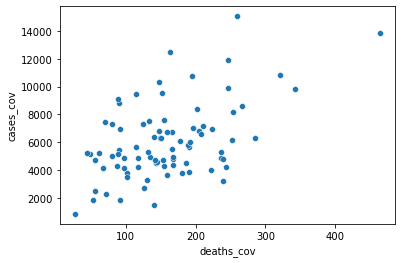

In [82]:
curr_co = med['deaths_cov'].corr(med.cases_cov)
curr_co
print("Коэффициент корреляции " + str(curr_co))
sns.scatterplot(x="deaths_cov", y='cases_cov', data=med)

2. В регионах из исследуемой выборки в среднем на **24% (на 135 человек на 100 тыс. населения)** больше умирает людей от болезней системы кровообращения, чем в целом по стране. Известно, что коронавирус оказывает сильное влияние на систему кровообращения, и регионы, в которых население подвержено болезням сердца и сосудов, очевидно сильнее могут страдать от последствий Ковид - 19.

## Рейтинг губернаторов <a class="anchor" id="third-bullet"></a>

Рейтинг губернаторов был добавлен в исследование, исходя из предположения, что качество жизни, важной частью которого являются здоровье, продолжительность жизни, доступ к медицинским услугам, будут значительно коррелировать с данными рейтинга.

Это предположение оправдалось лишь на определенную часть.

Коэффициент корреляции 0.2807181957282947


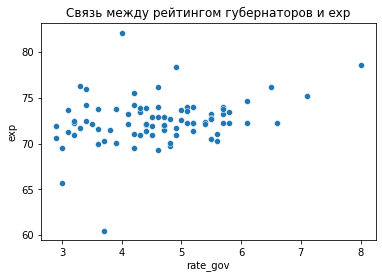

Коэффициент корреляции 0.9999999999999998


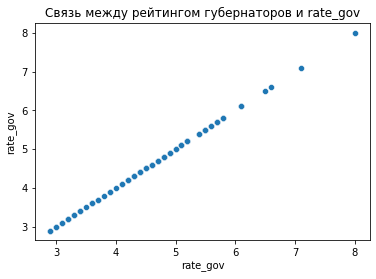

Коэффициент корреляции -0.23381769646678932


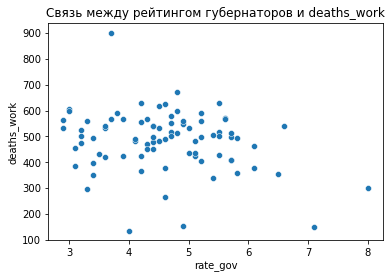

Коэффициент корреляции -0.24058710609813647


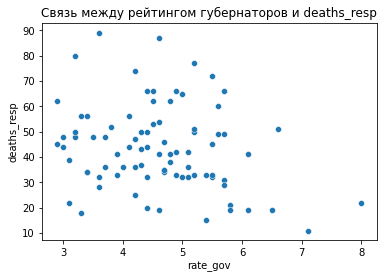

Коэффициент корреляции -0.23887131258664318


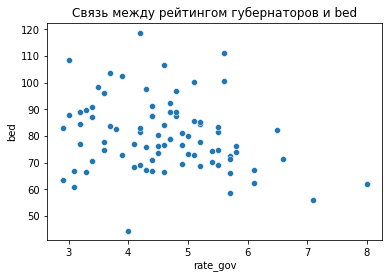

Коэффициент корреляции -0.26924197331752614


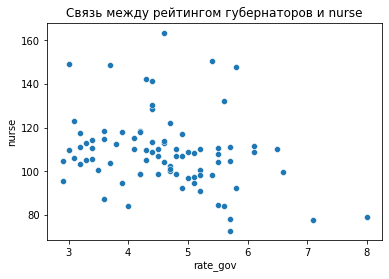

In [83]:
level = 0.2
for i in search[:-1]:
    curr_corr = med[i].corr(med.rate_gov)
    if abs(curr_corr) >= level:
        sns.scatterplot(x="rate_gov", y=i, data=med)
        print("Коэффициент корреляции " + str(curr_corr))
        plt.title("Связь между рейтингом губернаторов и "+str(i))
        plt.show()

Итак, какие выводы мы можем сделать.

1. Чуть ниже порогового значения умеренной связи, мы обнаруживаем, что рейтинг губернаторов коррелирует с ожидаемой продолжительностью жизни **(0,28)**. Выше рейтинг губернаторов в тех регионах, где и ожидаемая продолжительность жизни имеет более высокие значения.
2. Мы видим обратную связь между смертностью в трудоспособном возрасте **(-0,23)**, смертностью от болезней органов дыхания **(-0,24)**, количеством коек в стационарах **(-0,24)**, количеством среднего медицинского персонала **(-0,27)** и рейтингом губернаторов. Такая корреляция, хоть и невелика, но в совокупности важна и понятна из анализа выше: чем меньше смертность - тем меньше количество коек и медицинского персонала. 

Наряду с более высокой ожидаемой продолжительностью жизни, которая, как мы выяснили выше, сильно коррелирует со смертностью в трудоспособном возрасте **(-0,89)**, мы все - таки можем сделать вывод о важности корреляции рейтинга губернаторов и медицинской статистики.